A Autoridade De Estatística das Filipinas (PSA) lidera a realização da Pesquisa de Renda e Despesa Familiar (FIES) em todo o país. A pesquisa, realizada a cada 3 (três) anos, tem como objetivo fornecer dados sobre renda e despesas familiares, incluindo, entre outros, níveis de consumo por item de despesa, fontes de renda em dinheiro e informações relacionadas que afetam a renda e níveis de despesas e padrões nas Filipinas. Dessa forma, pede-se que seja elaborado um relatório prévio com insights e análise de dados por parte de um cientista de dados.

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')
sns.set()

In [204]:
# Carregando dataframe e verificando conteúdo
df = pd.read_csv('Family Income and Expenditure.csv')
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [3]:
# Verificando tamanho do dataframe
df.shape

(41544, 60)

In [4]:
# Verificando colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
Total Household Income                           41544 non-null int64
Region                                           41544 non-null object
Total Food Expenditure                           41544 non-null int64
Main Source of Income                            41544 non-null object
Agricultural Household indicator                 41544 non-null int64
Bread and Cereals Expenditure                    41544 non-null int64
Total Rice Expenditure                           41544 non-null int64
Meat Expenditure                                 41544 non-null int64
Total Fish and  marine products Expenditure      41544 non-null int64
Fruit Expenditure                                41544 non-null int64
Vegetables Expenditure                           41544 non-null int64
Restaurant and hotels Expenditure                41544 non-null int64
Alcoholic Beverages Expenditure                  

In [5]:
# Verificando valores numéricos
df.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


In [6]:
# Verificando quais colunas são categóricas
mask = df.dtypes == object
df.columns[mask]

Index(['Region', 'Main Source of Income', 'Household Head Sex',
       'Household Head Marital Status',
       'Household Head Highest Grade Completed',
       'Household Head Job or Business Indicator', 'Household Head Occupation',
       'Household Head Class of Worker', 'Type of Household',
       'Type of Building/House', 'Type of Roof', 'Type of Walls',
       'Tenure Status', 'Toilet Facilities', 'Main Source of Water Supply'],
      dtype='object')

In [7]:
df['Region'].value_counts(normalize=True)

IVA - CALABARZON             0.100183
NCR                          0.099413
III - Central Luzon          0.077917
VI - Western Visayas         0.068626
VII - Central Visayas        0.061164
V - Bicol Region             0.059503
XI - Davao Region            0.058877
I - Ilocos Region            0.056518
VIII - Eastern Visayas       0.056254
 ARMM                        0.054111
II - Cagayan Valley          0.053413
XII - SOCCSKSARGEN           0.051078
X - Northern Mindanao        0.045422
IX - Zasmboanga Peninsula    0.043039
Caraga                       0.042894
CAR                          0.041522
IVB - MIMAROPA               0.030065
Name: Region, dtype: float64

In [8]:
df['Main Source of Income'].value_counts(normalize=True)

Wage/Salaries                 0.490757
Other sources of Income       0.260832
Enterpreneurial Activities    0.248411
Name: Main Source of Income, dtype: float64

In [9]:
df['Household Head Sex'].value_counts(normalize=True)

Male      0.781894
Female    0.218106
Name: Household Head Sex, dtype: float64

In [10]:
df['Household Head Marital Status'].value_counts(normalize=True)

Married               0.754549
Widowed               0.164115
Single                0.046746
Divorced/Separated    0.034301
Annulled              0.000265
Unknown               0.000024
Name: Household Head Marital Status, dtype: float64

In [11]:
df['Household Head Highest Grade Completed'].value_counts(normalize=True)

High School Graduate                                                                                                                                                                                                   0.231754
Elementary Graduate                                                                                                                                                                                                    0.183901
Grade 4                                                                                                                                                                                                                0.054930
Grade 5                                                                                                                                                                                                                0.051102
Second Year High School                                                                                 

In [12]:
df['Household Head Job or Business Indicator'].value_counts(normalize=True)

With Job/Business    0.818602
No Job/Business      0.181398
Name: Household Head Job or Business Indicator, dtype: float64

In [13]:
df['Household Head Occupation'].value_counts(normalize=True)

Farmhands and laborers                                                                 0.102270
Rice farmers                                                                           0.083774
General managers/managing proprietors in wholesale and retail trade                    0.059633
General managers/managing proprietors in transportation, storage and communications    0.056810
Corn farmers                                                                           0.050694
                                                                                         ...   
Insulation workers                                                                     0.000029
Fiber preparers                                                                        0.000029
Wood treaters                                                                          0.000029
Vehicle, window and related cleaners                                                   0.000029
Metal drawers and extruders             

In [14]:
df['Household Head Class of Worker'].value_counts(normalize=True)

Self-employed wihout any employee                             0.404787
Worked for private establishment                              0.403758
Worked for government/government corporation                  0.082922
Employer in own family-operated farm or business              0.075894
Worked for private household                                  0.023847
Worked without pay in own family-operated farm or business    0.008380
Worked with pay in own family-operated farm or business       0.000412
Name: Household Head Class of Worker, dtype: float64

In [15]:
df['Household Head Class of Worker'].value_counts(normalize=True)

Self-employed wihout any employee                             0.404787
Worked for private establishment                              0.403758
Worked for government/government corporation                  0.082922
Employer in own family-operated farm or business              0.075894
Worked for private household                                  0.023847
Worked without pay in own family-operated farm or business    0.008380
Worked with pay in own family-operated farm or business       0.000412
Name: Household Head Class of Worker, dtype: float64

In [16]:
df.isna().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [17]:
df['Household Head Occupation'].value_counts(normalize=True)

Farmhands and laborers                                                                 0.102270
Rice farmers                                                                           0.083774
General managers/managing proprietors in wholesale and retail trade                    0.059633
General managers/managing proprietors in transportation, storage and communications    0.056810
Corn farmers                                                                           0.050694
                                                                                         ...   
Insulation workers                                                                     0.000029
Fiber preparers                                                                        0.000029
Wood treaters                                                                          0.000029
Vehicle, window and related cleaners                                                   0.000029
Metal drawers and extruders             

In [18]:
df['Type of Household'].value_counts(normalize=True)

Single Family                             0.684696
Extended Family                           0.311284
Two or More Nonrelated Persons/Members    0.004020
Name: Type of Household, dtype: float64

In [19]:
df['Type of Building/House'].value_counts(normalize=True)

Single house                                   0.940425
Multi-unit residential                         0.031990
Duplex                                         0.026093
Commercial/industrial/agricultural building    0.001228
Institutional living quarter                   0.000217
Other building unit (e.g. cave, boat)          0.000048
Name: Type of Building/House, dtype: float64

In [20]:
df['Type of Roof'].value_counts(normalize=True)

Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)    0.802571
Light material (cogon,nipa,anahaw)                                        0.122136
Mixed but predominantly strong materials                                  0.048190
Mixed but predominantly light materials                                   0.020364
Salvaged/makeshift materials                                              0.005103
Mixed but predominantly salvaged materials                                0.001348
Not Applicable                                                            0.000289
Name: Type of Roof, dtype: float64

In [21]:
df['Type of Walls'].value_counts(normalize=True)

Strong            0.667702
Light             0.198994
Quite Strong      0.083935
Very Light        0.038104
Salvaged          0.010976
NOt applicable    0.000289
Name: Type of Walls, dtype: float64

In [22]:
df['Type of Building/House'].value_counts(normalize=True)

Single house                                   0.940425
Multi-unit residential                         0.031990
Duplex                                         0.026093
Commercial/industrial/agricultural building    0.001228
Institutional living quarter                   0.000217
Other building unit (e.g. cave, boat)          0.000048
Name: Type of Building/House, dtype: float64

In [23]:
df['Tenure Status'].value_counts(normalize=True)

Own or owner-like possession of house and lot        0.711077
Own house, rent-free lot with consent of owner       0.148397
Rent house/room including lot                        0.053028
Rent-free house and lot with consent of owner        0.048479
Own house, rent-free lot without consent of owner    0.023951
Own house, rent lot                                  0.010230
Rent-free house and lot without consent of owner     0.003081
Not Applicable                                       0.001757
Name: Tenure Status, dtype: float64

In [24]:
df['Toilet Facilities'].value_counts(normalize=True)

Water-sealed, sewer septic tank, used exclusively by household    0.701955
Water-sealed, sewer septic tank, shared with other household      0.088918
Water-sealed, other depository, used exclusively by household     0.056398
Closed pit                                                        0.054713
None                                                              0.038032
Open pit                                                          0.028620
Water-sealed, other depository, shared with other household       0.022867
Others                                                            0.008497
Name: Toilet Facilities, dtype: float64

In [25]:
df['Main Source of Water Supply'].value_counts(normalize=True)

Own use, faucet, community water system    0.387372
Shared, tubed/piped deep well              0.150250
Shared, faucet, community water system     0.111063
Own use, tubed/piped deep well             0.110413
Dug well                                   0.093299
Protected spring, river, stream, etc       0.063956
Tubed/piped shallow well                   0.033555
Peddler                                    0.020484
Unprotected spring, river, stream, etc     0.014611
Lake, river, rain and others               0.011939
Others                                     0.003057
Name: Main Source of Water Supply, dtype: float64

#### Milestone 1 - Amostra e Descrição
Calcule o tamanho de amostra ideal, considerando que você deseja estimar a média de dinheiro gasto com saúde (Medical Care Expenditure) com um erro máximo de 500, e um nível de confiança de 95%.

Obtenha uma amostra do dataset, considerando o tamanho da amostra que você calculou anteriormente e, em seguida, faça uma análise descritiva dos dados com, pelo menos, 10 variáveis quantitativas.

In [26]:
from scipy.stats import norm
from scipy.stats import t as t_student

df['Medical Care Expenditure'].describe()

count    4.154400e+04
mean     7.160231e+03
std      2.690200e+04
min      0.000000e+00
25%      3.000000e+02
50%      1.125000e+03
75%      4.680000e+03
max      1.049275e+06
Name: Medical Care Expenditure, dtype: float64

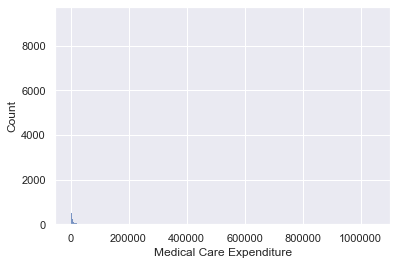

In [27]:
sns.histplot(df['Medical Care Expenditure'])

In [28]:
from scipy.stats import normaltest

sign = 0.05
conf = 1 - sign # 0.95

test_stat, p_value = normaltest(df['Medical Care Expenditure'])
print(f'test_stat: {test_stat}\np_value: {p_value}')

if (p_value <= sign):
    print('Rejeitar H0, ou seja, o nosso conjunto de dados NÃO segue uma distribuição normal.')
else:
    print('Aceitar H0, ou seja, o nosso conjunto de dados segue uma distribuição normal.')

test_stat: 79949.93716063502
p_value: 0.0
Rejeitar H0, ou seja, o nosso conjunto de dados NÃO segue uma distribuição normal.


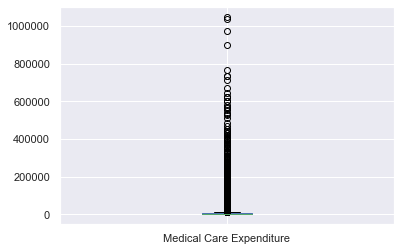

In [29]:
df.boxplot('Medical Care Expenditure')

In [30]:
# Vamos tentar remover os outliers para verificar se a distribuição se torna normal

# Remover os outliers
def removeOutliers(df, coluna):
    Q1 = df[coluna].quantile(q=0.25)
    Q3 = df[coluna].quantile(q=0.75)

    IQR = Q3 - Q1 # Intervalo interquartílico

    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR

    return df[(df[coluna] > inf) & (df[coluna] < sup)]
# 25380

In [31]:
med_care_df = df[['Medical Care Expenditure']]

linhas = med_care_df.shape[1]
x = 0

while linhas != removeOutliers(med_care_df, 'Medical Care Expenditure').shape[0]:
    x += 1
    med_care_df = removeOutliers(med_care_df, 'Medical Care Expenditure')
    print(f'ciclo: {x} shape atual: {med_care_df.shape}')
    linhas = med_care_df.shape[0]

ciclo: 1 shape atual: (36130, 1)
ciclo: 2 shape atual: (32860, 1)
ciclo: 3 shape atual: (30729, 1)
ciclo: 4 shape atual: (29229, 1)
ciclo: 5 shape atual: (28136, 1)
ciclo: 6 shape atual: (27324, 1)
ciclo: 7 shape atual: (26714, 1)
ciclo: 8 shape atual: (26344, 1)
ciclo: 9 shape atual: (26134, 1)
ciclo: 10 shape atual: (25961, 1)
ciclo: 11 shape atual: (25800, 1)
ciclo: 12 shape atual: (25717, 1)
ciclo: 13 shape atual: (25657, 1)
ciclo: 14 shape atual: (25594, 1)
ciclo: 15 shape atual: (25536, 1)
ciclo: 16 shape atual: (25500, 1)
ciclo: 17 shape atual: (25462, 1)
ciclo: 18 shape atual: (25445, 1)
ciclo: 19 shape atual: (25421, 1)
ciclo: 20 shape atual: (25410, 1)
ciclo: 21 shape atual: (25398, 1)
ciclo: 22 shape atual: (25390, 1)
ciclo: 23 shape atual: (25380, 1)


In [32]:
med_care_df['Medical Care Expenditure'].describe()

count    25380.000000
mean       588.343144
std        541.479855
min          0.000000
25%        151.000000
50%        404.500000
75%        912.000000
max       2053.000000
Name: Medical Care Expenditure, dtype: float64

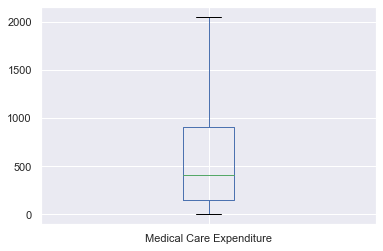

In [33]:
med_care_df.boxplot('Medical Care Expenditure')

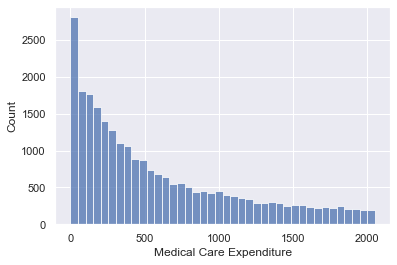

In [34]:
sns.histplot(med_care_df['Medical Care Expenditure'])

In [35]:
from scipy.stats import normaltest

sign = 0.05
conf = 1 - sign # 0.95

test_stat, p_value = normaltest(med_care_df['Medical Care Expenditure'])
print(f'test_stat: {test_stat}\np_value: {p_value}')

if (p_value <= sign):
    print('Rejeitar H0, ou seja, o nosso conjunto de dados NÃO segue uma distribuição normal.')
else:
    print('Aceitar H0, ou seja, o nosso conjunto de dados segue uma distribuição normal.')

test_stat: 2941.3927744758216
p_value: 0.0
Rejeitar H0, ou seja, o nosso conjunto de dados NÃO segue uma distribuição normal.


In [36]:
# Distribuição não é normal então vou utilizar váriavel original sem modificações apenas para responder o exercício

### 1 a

In [37]:
conf = 0.95
sign = 1 - conf
max_erro = 500
sigma = df['Medical Care Expenditure'].std()

In [38]:
z_alpha_2 = norm.ppf(conf + sign / 2)
z_alpha_2

1.959963984540054

In [39]:
n = (z_alpha_2 * sigma / max_erro)**2
n

11120.527374834443

In [40]:
n = int(np.ceil(n))
print(n, 'elementos')

11121 elementos


### 1 b

In [41]:
df_amostra = df.sample(n)
df_amostra

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
7004,371278,V - Bicol Region,113025,Wage/Salaries,0,32547,23644,9166,16144,1650,...,0,1,0,0,0,3,1,0,0,0
35460,542005,IX - Zasmboanga Peninsula,178062,Enterpreneurial Activities,0,57833,45925,18536,17776,4216,...,1,1,0,0,0,5,1,1,0,4
13870,706897,I - Ilocos Region,213395,Wage/Salaries,0,47909,35700,23093,12104,4903,...,1,1,1,1,0,8,1,0,0,2
4372,80570,VII - Central Visayas,17066,Other sources of Income,0,2293,1678,7460,3519,520,...,0,0,0,0,0,0,0,0,0,0
16605,173271,IVA - CALABARZON,124622,Other sources of Income,0,24772,10964,32110,17471,1842,...,1,1,0,0,0,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10307,161018,VII - Central Visayas,76636,Wage/Salaries,0,28190,24992,12056,6198,1230,...,0,0,0,0,0,2,1,0,0,0
31428,177502,V - Bicol Region,80128,Enterpreneurial Activities,0,26726,21030,4152,11298,3927,...,0,0,0,0,0,2,0,0,0,2
22198,102246,X - Northern Mindanao,25438,Enterpreneurial Activities,0,8779,3276,1860,6368,290,...,1,0,0,0,0,0,0,0,0,0
23525,71014,VI - Western Visayas,67657,Enterpreneurial Activities,1,35174,28272,5720,6714,2675,...,0,0,0,0,0,1,0,0,0,1


In [42]:
df_amostra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11121 entries, 7004 to 35143
Data columns (total 60 columns):
Total Household Income                           11121 non-null int64
Region                                           11121 non-null object
Total Food Expenditure                           11121 non-null int64
Main Source of Income                            11121 non-null object
Agricultural Household indicator                 11121 non-null int64
Bread and Cereals Expenditure                    11121 non-null int64
Total Rice Expenditure                           11121 non-null int64
Meat Expenditure                                 11121 non-null int64
Total Fish and  marine products Expenditure      11121 non-null int64
Fruit Expenditure                                11121 non-null int64
Vegetables Expenditure                           11121 non-null int64
Restaurant and hotels Expenditure                11121 non-null int64
Alcoholic Beverages Expenditure               

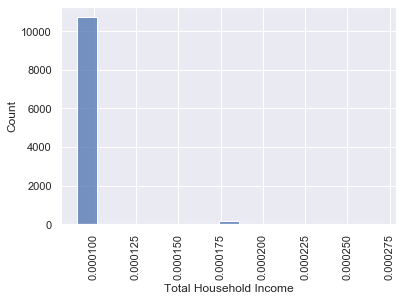

In [43]:
#Análise descritiva das variáveis quantitativas
df1 = df_amostra['Total Household Income'].value_counts(normalize=True)
sns.histplot(df1)
plt.xticks(rotation=90)
plt.show()

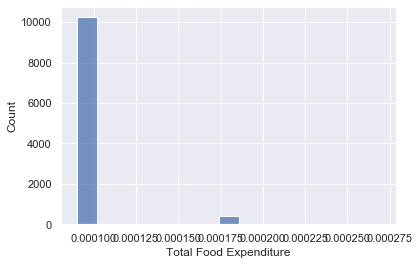

In [44]:
df2= df_amostra['Total Food Expenditure'].value_counts(normalize=True)
sns.histplot(df2)

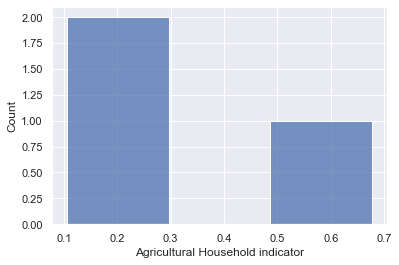

In [45]:
df3 = df_amostra['Agricultural Household indicator'].value_counts(normalize=True)
sns.histplot(df3)

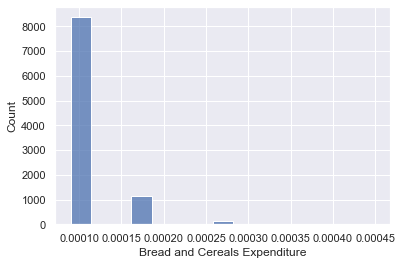

In [46]:
df4 = df_amostra['Bread and Cereals Expenditure'].value_counts(normalize=True)
sns.histplot(df4)

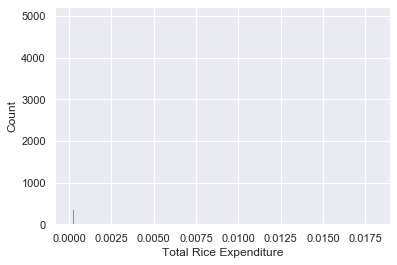

In [47]:
df5 = df_amostra['Total Rice Expenditure'].value_counts(normalize=True)
sns.histplot(df5)

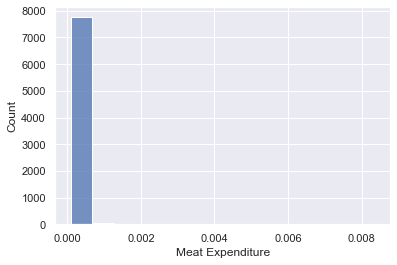

In [48]:
df6 = df_amostra['Meat Expenditure'].value_counts(normalize=True)
sns.histplot(df6)

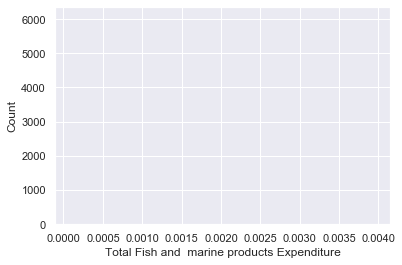

In [49]:
df7= df_amostra['Total Fish and  marine products Expenditure'].value_counts(normalize=True)
sns.histplot(df7)

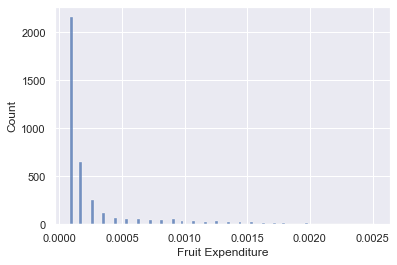

In [50]:
df8 = df_amostra['Fruit Expenditure'].value_counts(normalize=True)
sns.histplot(df8)

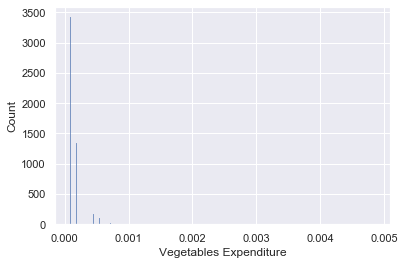

In [51]:
df9 = df_amostra['Vegetables Expenditure'].value_counts(normalize=True)
sns.histplot(df9)

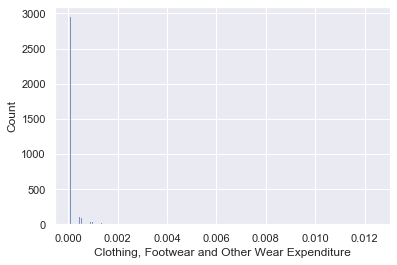

In [52]:
df10 = df_amostra['Clothing, Footwear and Other Wear Expenditure'].value_counts(normalize=True)
sns.histplot(df10)

#### Milestone 2 - Inferência Estatística
Utilizando um nível de confiança de 95%, calcule o intervalo de confiança do dinheiro gasto com saúde e educação (colunas: Medical Care Expenditure e Education Expenditure).

Calcule se há diferença de média de número total de membros da família pelo sexo do chefe de família (Household Head Sex e Total Number of Family members) com 95% de confiança.

Verifique se há diferença de média total de renda da família (Total Household Income) de acordo com a fonte salarial (Main Source of Income).

Considere “Enteroreneurial activities” e “other sources of income” como "outros".

#### Utilizando um nível de confiança de 95%, calcule o intervalo de confiança do dinheiro gasto com saúde e educação (colunas: Medical Care Expenditure e Education Expenditure)

In [53]:
# Verificando intervalo de confiança para Medical Care Expenditure
med_care_exp = df['Medical Care Expenditure']
med_care_exp

0        3457
1        3520
2          70
3          60
4         140
         ... 
41539     294
41540     890
41541     540
41542     314
41543     330
Name: Medical Care Expenditure, Length: 41544, dtype: int64

In [54]:
conf = 0.95
sign = 1 - conf
u = med_care_exp.mean()
s = med_care_exp.std()
n = med_care_exp.shape[0]
print(f'média amostral: {u}\ndesvio da amostra: {s}\nnúmero de amostras: {n}')

média amostral: 7160.230935875216
desvio da amostra: 26902.002274617116
número de amostras: 41544


In [55]:
z_alpha_2 = norm.ppf(conf + sign / 2)
z_alpha_2

1.959963984540054

In [56]:
erro = z_alpha_2 * s / np.sqrt(n)
erro

258.68934506630364

In [57]:
print('Intervalo de confiança da média:', (u - erro, u + erro))

Intervalo de confiança da média: (6901.541590808913, 7418.92028094152)


In [58]:
# De uma forma mais prática
norm.interval(conf, loc=u, scale=s/np.sqrt(n))

(6901.541590808913, 7418.92028094152)

In [59]:
# Verificando intervalo de confiança para Education Expenditure
edu_exp = df['Education Expenditure']
edu_exp

0        36200
1        29300
2          425
3          300
4            0
         ...  
41539       50
41540     1550
41541        0
41542     5295
41543       80
Name: Education Expenditure, Length: 41544, dtype: int64

In [60]:
conf = 0.95
sign = 1 - conf
u = edu_exp.mean()
s = edu_exp.std()
n = edu_exp.shape[0]
print(f'média amostral: {u}\ndesvio da amostra: {s}\nnúmero de amostras: {n}')

média amostral: 7473.500481417293
desvio da amostra: 21219.170907296462
número de amostras: 41544


In [61]:
# De uma forma mais prática
norm.interval(conf, loc=u, scale=s/np.sqrt(n))

(7269.4571775462755, 7677.54378528831)

#### Calcule se há diferença de média de número total de membros da família pelo sexo do chefe de família (Household Head Sex e Total Number of Family members) com 95% de confiança.

In [62]:
df_sex = df[['Household Head Sex','Total Number of Family members']]
df_sex

,Household Head Sex,Total Number of Family members
0,Female,4
1,Male,3
2,Male,6
3,Male,3
4,Male,4
...,...,...
41539,Male,6
41540,Male,6
41541,Male,4
41542,Male,9


In [63]:
df_female = df_sex[df_sex['Household Head Sex'] == 'Female'].sample(n=5000, replace=False)
df_female

,Household Head Sex,Total Number of Family members
7587,Female,5
27862,Female,4
37094,Female,2
8950,Female,9
2698,Female,3
...,...,...
6681,Female,3
30034,Female,5
1444,Female,2
29155,Female,2


In [64]:
df_male = df_sex[df_sex['Household Head Sex'] == 'Male'].sample(n=5000, replace=False)
df_male

,Household Head Sex,Total Number of Family members
16341,Male,2
34551,Male,5
4080,Male,6
6022,Male,6
1226,Male,7
...,...,...
31225,Male,5
33515,Male,4
9157,Male,4
13937,Male,7


In [65]:
female_mean = df_female['Total Number of Family members'].mean()
female_std = df_female['Total Number of Family members'].std()
female_mean, female_std

(3.8426, 2.2150409750847917)

In [66]:
male_mean = df_male['Total Number of Family members'].mean()
male_std = df_male['Total Number of Family members'].std()
male_mean, male_std

(4.8522, 2.195021362938559)

In [67]:
n_female = 5000
n_male = 5000
significancia = 0.05
confianca = 1 - significancia
D_0 = 0

H0 = u_male - u_female >= D_0
H1 = u_male - u_female < D_0

In [68]:
z_alpha_2 = norm.ppf(confianca) / 2
z_alpha_2

0.8224268134757361

In [69]:
num = (male_mean - female_mean) - D_0
den = np.sqrt((male_std ** 2 / n_male) + (female_std ** 2 / n_female))
z = num / den
z

22.892864549162926

In [70]:
if(z <= -z_alpha_2 or z >= z_alpha_2):
    print('Rejeitar H0, portanto, há diferença entre as médias')
else:
    print('Aceitar H0')

Rejeitar H0, portanto, há diferença entre as médias


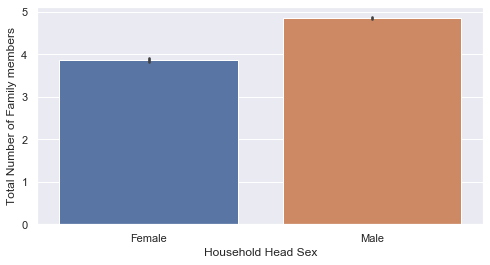

In [71]:
plt.figure(figsize=(8,4))

sns.barplot(data=df, x='Household Head Sex', y='Total Number of Family members')

#### Verifique se há diferença de média total de renda da família (Total Household Income) de acordo com a fonte salarial (Main Source of Income).

In [72]:
df_income = df[['Total Household Income', 'Main Source of Income']]
df_income

,Total Household Income,Main Source of Income
0,480332,Wage/Salaries
1,198235,Wage/Salaries
2,82785,Wage/Salaries
3,107589,Wage/Salaries
4,189322,Wage/Salaries
...,...,...
41539,119773,Enterpreneurial Activities
41540,137320,Enterpreneurial Activities
41541,133171,Enterpreneurial Activities
41542,129500,Enterpreneurial Activities


In [73]:
df_income['Main Source of Income'].value_counts()

Wage/Salaries                 20388
Other sources of Income       10836
Enterpreneurial Activities    10320
Name: Main Source of Income, dtype: int64

In [74]:
wage_salaries = df_income[df_income['Main Source of Income'] == 'Wage/Salaries'].sample(n=5000, replace=False)

In [75]:
others_df = df_income[(df_income['Main Source of Income'] == 'Other sources of Income') | (df_income['Main Source of Income'] == 'Enterpreneurial Activities')].sample(n=5000, replace=False)

In [76]:
wage_salaries_mean = wage_salaries['Total Household Income'].mean()
wage_salaries_std = wage_salaries['Total Household Income'].std()
wage_salaries_mean, wage_salaries_std

(273649.7788, 272882.93036199716)

In [77]:
others_mean = others_df['Total Household Income'].mean()
others_std = others_df['Total Household Income'].std()
others_mean, others_std

(228676.351, 346094.83673374663)

In [78]:
n_wage_salaries = 5000
n_others = 5000
significancia = 0.05
confianca =  1 - significancia
D_0 = 0

H0 = u_wage_salaries - u_others >= D_0
H1 = u_wage_salaries - u_others < D_0

In [79]:
z_alpha_2 = norm.ppf(confianca) / 2
z_alpha_2

0.8224268134757361

In [80]:
num = (wage_salaries_mean - others_mean) - D_0
den = np.sqrt((wage_salaries_std ** 2 / n_wage_salaries) + (others_std ** 2 / n_others))
z = num / den
z

7.215461841407246

In [81]:
if(z <= -z_alpha_2 or z >= z_alpha_2):
    print('Rejeitar H0, portanto, há diferença entre as médias')
else:
    print('Aceitar H0')

Rejeitar H0, portanto, há diferença entre as médias


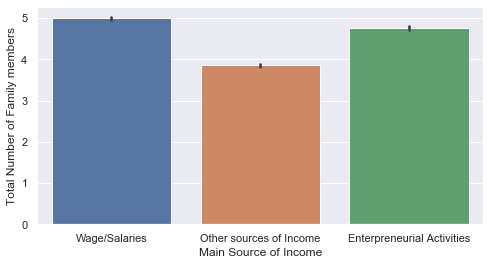

In [82]:
plt.figure(figsize=(8,4))

sns.barplot(data=df, x='Main Source of Income', y='Total Number of Family members')

#### Milestone 3 - Previsão de Renda Com Regressão Linear
Usando Regressão Linear, crie um modelo de previsão de renda de forma a minimizar o erro. Considere 70% dos dados para treinar o modelo, e 30% para testá-lo. Por fim, utilize as métricas de avaliação do modelo que foram estudadas para validá-lo.

In [205]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [206]:
X = df.drop(['Total Household Income'], axis=1).copy(deep=True) # Variáveis explicativas
y = df['Total Household Income'].copy(deep=True)                # Variável resposta

In [207]:
# Verificando colunas com valores nulos que precisarão ser tratados de alguma forma
X.isnull().sum().sort_values(ascending=False)

Household Head Occupation                        7536
Household Head Class of Worker                   7536
Household Head Job or Business Indicator            0
Household Head Marital Status                       0
Household Head Age                                  0
Household Head Sex                                  0
Total Income from Entrepreneurial Acitivites        0
Crop Farming and Gardening expenses                 0
Special Occasions Expenditure                       0
Miscellaneous Goods and Services Expenditure        0
Education Expenditure                               0
Communication Expenditure                           0
Transportation Expenditure                          0
Medical Care Expenditure                            0
Imputed House Rental Value                          0
Housing and water Expenditure                       0
Clothing, Footwear and Other Wear Expenditure       0
Tobacco Expenditure                                 0
Alcoholic Beverages Expendit

In [208]:
# Verificando Household Head Occupation
X['Household Head Occupation'].value_counts(normalize=True)

Farmhands and laborers                                                                 0.102270
Rice farmers                                                                           0.083774
General managers/managing proprietors in wholesale and retail trade                    0.059633
General managers/managing proprietors in transportation, storage and communications    0.056810
Corn farmers                                                                           0.050694
                                                                                         ...   
Insulation workers                                                                     0.000029
Fiber preparers                                                                        0.000029
Wood treaters                                                                          0.000029
Vehicle, window and related cleaners                                                   0.000029
Metal drawers and extruders             

In [209]:
# Coluna tem valores nulos e categorias demais com pouca representatividade portanto irei dropar a coluna
X = X.drop('Household Head Occupation', axis=1)

In [210]:
X['Household Head Class of Worker'].value_counts(normalize=True)

Self-employed wihout any employee                             0.404787
Worked for private establishment                              0.403758
Worked for government/government corporation                  0.082922
Employer in own family-operated farm or business              0.075894
Worked for private household                                  0.023847
Worked without pay in own family-operated farm or business    0.008380
Worked with pay in own family-operated farm or business       0.000412
Name: Household Head Class of Worker, dtype: float64

In [211]:
# Esta categoria pode ser mais util porém vou dropa-la inicialmente
X = X.drop('Household Head Class of Worker', axis=1)

In [212]:
# Verificando quantidade de linhas com valor zero por coluna
(X == 0).sum()

Region                                               0
Total Food Expenditure                               0
Main Source of Income                                0
Agricultural Household indicator                 28106
Bread and Cereals Expenditure                       15
Total Rice Expenditure                             715
Meat Expenditure                                   346
Total Fish and  marine products Expenditure        147
Fruit Expenditure                                   72
Vegetables Expenditure                             205
Restaurant and hotels Expenditure                 3792
Alcoholic Beverages Expenditure                  16830
Tobacco Expenditure                              19449
Clothing, Footwear and Other Wear Expenditure      521
Housing and water Expenditure                        0
Imputed House Rental Value                        1895
Medical Care Expenditure                          1478
Transportation Expenditure                         309
Communicat

In [213]:
# Incialmente removerei colunas com a palavra expenditure
mask = X.columns.str.contains('expenditure', case=False)
X = X.drop(X.columns[mask], axis = 1)
X.columns

Index(['Region', 'Main Source of Income', 'Agricultural Household indicator',
       'Imputed House Rental Value', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Completed',
       'Household Head Job or Business Indicator', 'Type of Household',
       'Total Number of Family members',
       'Members with age less than 5 year old',
       'Members with age 5 - 17 years old',
       'Total number of family members employed', 'Type of Building/House',
       'Type of Roof', 'Type of Walls', 'House Floor Area', 'House Age',
       'Number of bedrooms', 'Tenure Status', 'Toilet Facilities',
       'Electricity', 'Main Source of Water Supply', 'Number of Television',
       'Number of CD/VCD/DVD', 'Number of Component/Stereo set',
       'Number of Refrigerator/Freezer', 'Number of Washing Machine',
       'Number of Aircond

In [214]:
# Verificando colunas categóricas pois precisarão serem tratadas
mask = X.dtypes == object
col_categoricas = X.columns[mask]
col_categoricas

Index(['Region', 'Main Source of Income', 'Household Head Sex',
       'Household Head Marital Status',
       'Household Head Highest Grade Completed',
       'Household Head Job or Business Indicator', 'Type of Household',
       'Type of Building/House', 'Type of Roof', 'Type of Walls',
       'Tenure Status', 'Toilet Facilities', 'Main Source of Water Supply'],
      dtype='object')

In [215]:
def mapping(dataframe, coluna):
    col_mapping = {c[1]:c[0] for c in enumerate(dataframe[coluna].unique())}
    dataframe[coluna] = dataframe[coluna].map(col_mapping)
    return dataframe

In [216]:
for coluna in col_categoricas:
    X = mapping(X, coluna)

In [217]:
# Verificando colunas categóricas pois precisarão serem tratadas
mask = X.dtypes == object
X.columns[mask]

Index([], dtype='object')

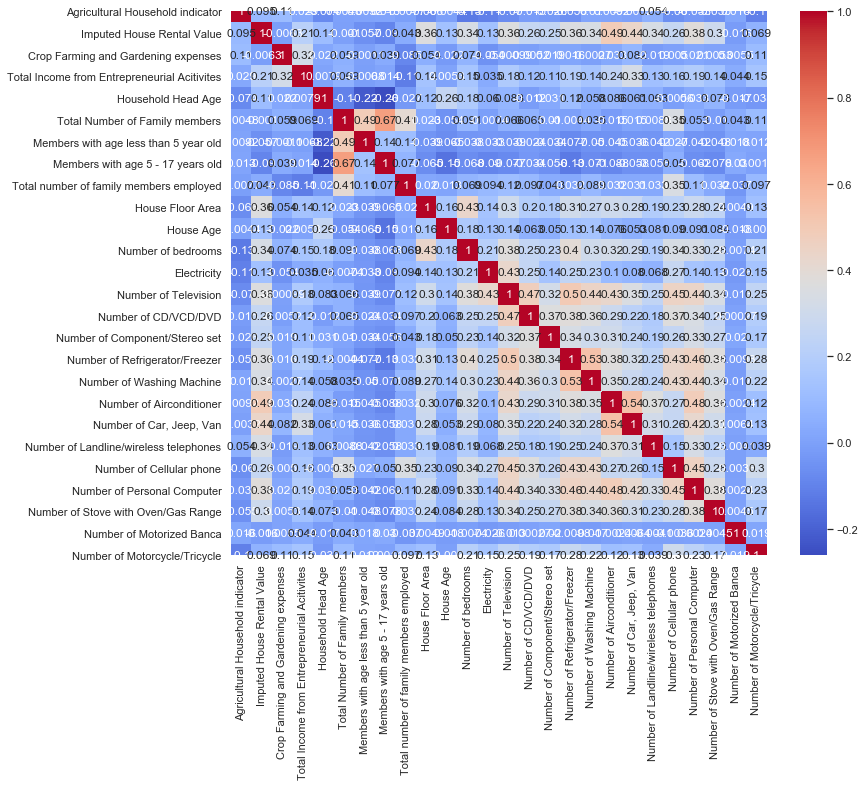

In [218]:
plt.figure(figsize=(12,10))
sns.heatmap(X.drop(col_categoricas, axis=1).corr(), annot=True, cmap='coolwarm')

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)
x = sm.add_constant(X_train)
model = sm.OLS(y_train, x).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.758
Model:                                OLS   Adj. R-squared:                  0.758
Method:                     Least Squares   F-statistic:                     2336.
Date:                    Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                            23:25:39   Log-Likelihood:            -3.8571e+05
No. Observations:                   29080   AIC:                         7.715e+05
Df Residuals:                       29040   BIC:                         7.718e+05
Df Model:                              39                                         
Covariance Type:                nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         3.066e+04   6931.232      4.423      0.000    1.71e+04    4.42e+04
Region                                         730.7333    191.211      3.822      0.000     355.950    1105.516
Main Source of Income                        -4.238e+04   1272.045    -33.313      0.000   -4.49e+04   -3.99e+04
Agricultural Household indicator              3392.5783   1345.463      2.521      0.012     755.409    6029.748
Imputed House Rental Value                       1.5704      0.027     58.452      0.000       1.518       1.623
Crop Farming and Gardening expenses              0.1298      0.020      6.393      0.000       0.090       0.170
Total Income from Entrepreneurial Acitivites     0.8604      0.007    122.762      0.000       0.847       0.874
Household Head Sex                            -1.57e+04   2386.301     -6.581      0.000   -2.04e+04    -1.1e+04
Household Head Age                             160.7882     75.569      2.128      0.033      12.670     308.906
Household Head Marital Status                -5677.5051   1682.237     -3.375      0.001   -8974.766   -2380.245
Household Head Highest Grade Completed         888.5236    108.099      8.220      0.000     676.646    1100.402
Household Head Job or Business Indicator      2.363e+04   2474.577      9.551      0.000    1.88e+04    2.85e+04
Type of Household                             -231.4665   2021.936     -0.114      0.909   -4194.554    3731.621
Total Number of Family members                4544.4873    810.979      5.604      0.000    2954.932    6134.043
Members with age less than 5 year old        -2292.6742   1604.022     -1.429      0.153   -5436.630     851.282
Members with age 5 - 17 years old            -4037.8323    993.786     -4.063      0.000   -5985.698   -2089.967
Total number of family members employed       3.098e+04    988.010     31.356      0.000     2.9e+04    3.29e+04
Type of Building/House                        9823.5284   1555.315      6.316      0.000    6775.039    1.29e+04
Type of Roof                                  -459.0566   1368.529     -0.335      0.737   -3141.435    2223.322
Type of Walls                                -2527.2209   1152.264     -2.193      0.028   -4785.711    -268.731
House Floor Area                                94.4509     17.580      5.373      0.000      59.994     128.908
House Age                                       42.3895     61.352      0.691      0.490     -77.864     162.643
Number of bedrooms                            7801.8054    928.874      8.399      0.000    5981.170    9622.441
Tenure Status                                 5194.0907    624.725      8.314      0.000    3969.600 

In [221]:
X_train = X_train.drop('Type of Household', axis = 1)

x = sm.add_constant(X_train)
model = sm.OLS(y_train, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.758
Model:                                OLS   Adj. R-squared:                  0.758
Method:                     Least Squares   F-statistic:                     2397.
Date:                    Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                            23:26:41   Log-Likelihood:            -3.8571e+05
No. Observations:                   29080   AIC:                         7.715e+05
Df Residuals:                       29041   BIC:                         7.718e+05
Df Model:                              38                                         
Covariance Type:                nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         3.034e+04   6334.424      4.789      0.000    1.79e+04    4.28e+04
Region                                         731.0438    191.189      3.824      0.000     356.305    1105.783
Main Source of Income                        -4.238e+04   1271.931    -33.317      0.000   -4.49e+04   -3.99e+04
Agricultural Household indicator              3387.6438   1344.750      2.519      0.012     751.873    6023.415
Imputed House Rental Value                       1.5704      0.027     58.459      0.000       1.518       1.623
Crop Farming and Gardening expenses              0.1298      0.020      6.392      0.000       0.090       0.170
Total Income from Entrepreneurial Acitivites     0.8604      0.007    122.766      0.000       0.847       0.874
Household Head Sex                           -1.574e+04   2367.040     -6.649      0.000   -2.04e+04   -1.11e+04
Household Head Age                             162.2579     74.469      2.179      0.029      16.295     308.221
Household Head Marital Status                -5674.2744   1681.971     -3.374      0.001   -8971.015   -2377.534
Household Head Highest Grade Completed         888.3741    108.089      8.219      0.000     676.515    1100.233
Household Head Job or Business Indicator      2.364e+04   2474.087      9.555      0.000    1.88e+04    2.85e+04
Total Number of Family members                4568.6533    783.009      5.835      0.000    3033.919    6103.388
Members with age less than 5 year old        -2287.4601   1603.348     -1.427      0.154   -5430.095     855.175
Members with age 5 - 17 years old            -4053.0806    984.802     -4.116      0.000   -5983.337   -2122.824
Total number of family members employed       3.098e+04    987.976     31.356      0.000     2.9e+04    3.29e+04
Type of Building/House                        9824.7643   1555.251      6.317      0.000    6776.401    1.29e+04
Type of Roof                                  -459.6919   1368.494     -0.336      0.737   -3142.003    2222.619
Type of Walls                                -2527.6780   1152.237     -2.194      0.028   -4786.116    -269.240
House Floor Area                                94.4691     17.579      5.374      0.000      60.014     128.924
House Age                                       42.5482     61.336      0.694      0.488     -77.672     162.769
Number of bedrooms                            7803.8225    928.691      8.403      0.000    5983.546    9624.099
Tenure Status                                 5193.6214    624.701      8.314      0.000    3969.178    6418.065
Toilet Facilities                            -1093.3310    553.004     -1.977      0.048   -2177.244 

In [223]:
X_train = X_train.drop('Type of Roof', axis = 1)

x = sm.add_constant(X_train)
model = sm.OLS(y_train, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.758
Model:                                OLS   Adj. R-squared:                  0.758
Method:                     Least Squares   F-statistic:                     2462.
Date:                    Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                            23:28:01   Log-Likelihood:            -3.8571e+05
No. Observations:                   29080   AIC:                         7.715e+05
Df Residuals:                       29042   BIC:                         7.718e+05
Df Model:                              37                                         
Covariance Type:                nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         3.025e+04   6328.923      4.780      0.000    1.78e+04    4.27e+04
Region                                         734.6184    190.890      3.848      0.000     360.466    1108.771
Main Source of Income                        -4.238e+04   1271.909    -33.317      0.000   -4.49e+04   -3.99e+04
Agricultural Household indicator              3375.8796   1344.273      2.511      0.012     741.043    6010.717
Imputed House Rental Value                       1.5704      0.027     58.460      0.000       1.518       1.623
Crop Farming and Gardening expenses              0.1299      0.020      6.397      0.000       0.090       0.170
Total Income from Entrepreneurial Acitivites     0.8604      0.007    122.767      0.000       0.847       0.874
Household Head Sex                           -1.574e+04   2367.002     -6.648      0.000   -2.04e+04   -1.11e+04
Household Head Age                             161.7514     74.453      2.173      0.030      15.821     307.682
Household Head Marital Status                -5676.5552   1681.932     -3.375      0.001   -8973.219   -2379.892
Household Head Highest Grade Completed         888.2539    108.087      8.218      0.000     676.399    1100.109
Household Head Job or Business Indicator      2.365e+04   2473.848      9.560      0.000    1.88e+04    2.85e+04
Total Number of Family members                4565.8422    782.953      5.832      0.000    3031.219    6100.465
Members with age less than 5 year old        -2282.6259   1603.259     -1.424      0.155   -5425.086     859.834
Members with age 5 - 17 years old            -4056.8144    984.724     -4.120      0.000   -5986.919   -2126.710
Total number of family members employed       3.098e+04    987.941     31.359      0.000     2.9e+04    3.29e+04
Type of Building/House                        9818.4614   1555.114      6.314      0.000    6770.366    1.29e+04
Type of Walls                                -2726.3921    988.771     -2.757      0.006   -4664.428    -788.356
House Floor Area                                94.5141     17.578      5.377      0.000      60.061     128.968
House Age                                       42.7947     61.330      0.698      0.485     -77.416     163.005
Number of bedrooms                            7810.3536    928.473      8.412      0.000    5990.504    9630.204
Tenure Status                                 5193.2866    624.691      8.313      0.000    3968.864    6417.710
Toilet Facilities                            -1099.8124    552.659     -1.990      0.047   -2183.049     -16.576
Electricity                                  -1.582e+04   3095.827     -5.110      0.000   -2.19e+04 

In [224]:
X_train = X_train.drop('House Age', axis = 1)

x = sm.add_constant(X_train)
model = sm.OLS(y_train, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.758
Model:                                OLS   Adj. R-squared:                  0.758
Method:                     Least Squares   F-statistic:                     2530.
Date:                    Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                            23:28:36   Log-Likelihood:            -3.8571e+05
No. Observations:                   29080   AIC:                         7.715e+05
Df Residuals:                       29043   BIC:                         7.718e+05
Df Model:                              36                                         
Covariance Type:                nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         3.059e+04   6310.501      4.847      0.000    1.82e+04     4.3e+04
Region                                         735.3756    190.885      3.852      0.000     361.233    1109.518
Main Source of Income                        -4.239e+04   1271.788    -33.329      0.000   -4.49e+04   -3.99e+04
Agricultural Household indicator              3401.9152   1343.743      2.532      0.011     768.117    6035.714
Imputed House Rental Value                       1.5707      0.027     58.485      0.000       1.518       1.623
Crop Farming and Gardening expenses              0.1298      0.020      6.391      0.000       0.090       0.170
Total Income from Entrepreneurial Acitivites     0.8603      0.007    122.767      0.000       0.847       0.874
Household Head Sex                            -1.58e+04   2365.081     -6.682      0.000   -2.04e+04   -1.12e+04
Household Head Age                             169.8632     73.539      2.310      0.021      25.724     314.002
Household Head Marital Status                -5691.5061   1681.781     -3.384      0.001   -8987.873   -2395.139
Household Head Highest Grade Completed         888.2784    108.086      8.218      0.000     676.426    1100.131
Household Head Job or Business Indicator      2.368e+04   2473.481      9.573      0.000    1.88e+04    2.85e+04
Total Number of Family members                4574.5249    782.847      5.843      0.000    3040.109    6108.941
Members with age less than 5 year old        -2295.0629   1603.145     -1.432      0.152   -5437.301     847.175
Members with age 5 - 17 years old            -4090.5673    983.527     -4.159      0.000   -6018.325   -2162.810
Total number of family members employed       3.097e+04    987.892     31.354      0.000     2.9e+04    3.29e+04
Type of Building/House                        9889.4400   1551.770      6.373      0.000    6847.899    1.29e+04
Type of Walls                                -2729.3552    988.753     -2.760      0.006   -4667.356    -791.354
House Floor Area                                95.3914     17.533      5.441      0.000      61.027     129.756
Number of bedrooms                            7852.6292    926.486      8.476      0.000    6036.674    9668.585
Tenure Status                                 5184.3152    624.553      8.301      0.000    3960.162    6408.468
Toilet Facilities                            -1114.5370    552.251     -2.018      0.044   -2196.974     -32.100
Electricity                                  -1.573e+04   3092.963     -5.085      0.000   -2.18e+04   -9664.547
Main Source of Water Supply                  -1042.9449    332.921     -3.133      0.002   -1695.486 

In [225]:
X_train = X_train.drop('Number of Component/Stereo set', axis = 1)

x = sm.add_constant(X_train)
model = sm.OLS(y_train, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.758
Model:                                OLS   Adj. R-squared:                  0.758
Method:                     Least Squares   F-statistic:                     2603.
Date:                    Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                            23:29:37   Log-Likelihood:            -3.8571e+05
No. Observations:                   29080   AIC:                         7.715e+05
Df Residuals:                       29044   BIC:                         7.718e+05
Df Model:                              35                                         
Covariance Type:                nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         3.063e+04   6310.286      4.854      0.000    1.83e+04     4.3e+04
Region                                         738.3039    190.855      3.868      0.000     364.220    1112.388
Main Source of Income                        -4.239e+04   1271.782    -33.330      0.000   -4.49e+04   -3.99e+04
Agricultural Household indicator              3383.1712   1343.567      2.518      0.012     749.719    6016.624
Imputed House Rental Value                       1.5713      0.027     58.520      0.000       1.519       1.624
Crop Farming and Gardening expenses              0.1300      0.020      6.403      0.000       0.090       0.170
Total Income from Entrepreneurial Acitivites     0.8603      0.007    122.770      0.000       0.847       0.874
Household Head Sex                            -1.58e+04   2365.066     -6.680      0.000   -2.04e+04   -1.12e+04
Household Head Age                             169.4528     73.537      2.304      0.021      25.317     313.589
Household Head Marital Status                -5696.4283   1681.764     -3.387      0.001   -8992.763   -2400.094
Household Head Highest Grade Completed         888.6352    108.084      8.222      0.000     676.785    1100.486
Household Head Job or Business Indicator      2.371e+04   2473.278      9.585      0.000    1.89e+04    2.86e+04
Total Number of Family members                4565.5653    782.777      5.833      0.000    3031.287    6099.843
Members with age less than 5 year old        -2289.6770   1603.127     -1.428      0.153   -5431.879     852.525
Members with age 5 - 17 years old            -4088.6229    983.520     -4.157      0.000   -6016.367   -2160.878
Total number of family members employed       3.097e+04    987.885     31.353      0.000     2.9e+04    3.29e+04
Type of Building/House                        9877.8356   1551.707      6.366      0.000    6836.419    1.29e+04
Type of Walls                                -2728.8864    988.749     -2.760      0.006   -4666.879    -790.894
House Floor Area                                95.2781     17.532      5.434      0.000      60.914     129.642
Number of bedrooms                            7866.2944    926.351      8.492      0.000    6050.605    9681.984
Tenure Status                                 5179.7228    624.529      8.294      0.000    3955.618    6403.827
Toilet Facilities                            -1116.1648    552.245     -2.021      0.043   -2198.591     -33.739
Electricity                                  -1.574e+04   3092.906     -5.089      0.000   -2.18e+04   -9679.059
Main Source of Water Supply                  -1048.1774    332.866     -3.149      0.002   -1700.610 

In [226]:
X_train = X_train.drop('Members with age less than 5 year old', axis = 1)

x = sm.add_constant(X_train)
model = sm.OLS(y_train, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.758
Model:                                OLS   Adj. R-squared:                  0.758
Method:                     Least Squares   F-statistic:                     2679.
Date:                    Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                            23:30:20   Log-Likelihood:            -3.8571e+05
No. Observations:                   29080   AIC:                         7.715e+05
Df Residuals:                       29045   BIC:                         7.718e+05
Df Model:                              34                                         
Covariance Type:                nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         2.947e+04   6257.652      4.709      0.000    1.72e+04    4.17e+04
Region                                         734.7182    190.841      3.850      0.000     360.660    1108.776
Main Source of Income                        -4.228e+04   1269.539    -33.304      0.000   -4.48e+04   -3.98e+04
Agricultural Household indicator              3435.5641   1343.090      2.558      0.011     803.046    6068.082
Imputed House Rental Value                       1.5711      0.027     58.514      0.000       1.518       1.624
Crop Farming and Gardening expenses              0.1305      0.020      6.428      0.000       0.091       0.170
Total Income from Entrepreneurial Acitivites     0.8608      0.007    122.951      0.000       0.847       0.875
Household Head Sex                            -1.56e+04   2361.208     -6.609      0.000   -2.02e+04    -1.1e+04
Household Head Age                             203.5840     69.547      2.927      0.003      67.269     339.899
Household Head Marital Status                -5862.4951   1677.770     -3.494      0.000   -9151.001   -2573.989
Household Head Highest Grade Completed         888.9677    108.086      8.225      0.000     677.114    1100.821
Household Head Job or Business Indicator       2.37e+04   2473.312      9.581      0.000    1.88e+04    2.85e+04
Total Number of Family members                3848.2996    600.459      6.409      0.000    2671.373    5025.226
Members with age 5 - 17 years old            -3424.8455    866.804     -3.951      0.000   -5123.821   -1725.870
Total number of family members employed       3.127e+04    965.612     32.385      0.000    2.94e+04    3.32e+04
Type of Building/House                        9888.3446   1551.718      6.373      0.000    6846.907    1.29e+04
Type of Walls                                -2734.6778    988.758     -2.766      0.006   -4672.689    -796.666
House Floor Area                                95.3281     17.532      5.437      0.000      60.964     129.692
Number of bedrooms                            7906.8155    925.933      8.539      0.000    6091.945    9721.686
Tenure Status                                 5166.1509    624.467      8.273      0.000    3942.166    6390.136
Toilet Facilities                            -1129.9166    552.171     -2.046      0.041   -2212.198     -47.636
Electricity                                  -1.582e+04   3092.447     -5.116      0.000   -2.19e+04   -9760.596
Main Source of Water Supply                  -1038.8674    332.808     -3.122      0.002   -1691.187    -386.548
Number of Television                          1.349e+04   1788.847      7.542      0.000    9985.702 

In [227]:
X_train = X_train.drop('Number of CD/VCD/DVD', axis = 1)

x = sm.add_constant(X_train)
model = sm.OLS(y_train, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.758
Model:                                OLS   Adj. R-squared:                  0.758
Method:                     Least Squares   F-statistic:                     2760.
Date:                    Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                            23:32:25   Log-Likelihood:            -3.8572e+05
No. Observations:                   29080   AIC:                         7.715e+05
Df Residuals:                       29046   BIC:                         7.718e+05
Df Model:                              33                                         
Covariance Type:                nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         2.972e+04   6255.852      4.751      0.000    1.75e+04     4.2e+04
Region                                         732.8288    190.843      3.840      0.000     358.767    1106.891
Main Source of Income                        -4.227e+04   1269.564    -33.296      0.000   -4.48e+04   -3.98e+04
Agricultural Household indicator              3457.5186   1343.062      2.574      0.010     825.056    6089.981
Imputed House Rental Value                       1.5726      0.027     58.599      0.000       1.520       1.625
Crop Farming and Gardening expenses              0.1302      0.020      6.412      0.000       0.090       0.170
Total Income from Entrepreneurial Acitivites     0.8608      0.007    122.954      0.000       0.847       0.875
Household Head Sex                           -1.551e+04   2360.551     -6.570      0.000   -2.01e+04   -1.09e+04
Household Head Age                             197.8195     69.460      2.848      0.004      61.675     333.964
Household Head Marital Status                -5874.1210   1677.804     -3.501      0.000   -9162.693   -2585.549
Household Head Highest Grade Completed         889.2833    108.089      8.227      0.000     677.424    1101.143
Household Head Job or Business Indicator      2.365e+04   2473.189      9.561      0.000    1.88e+04    2.85e+04
Total Number of Family members                3841.8739    600.463      6.398      0.000    2664.938    5018.809
Members with age 5 - 17 years old            -3416.7115    866.815     -3.942      0.000   -5115.708   -1717.715
Total number of family members employed       3.127e+04    965.637     32.380      0.000    2.94e+04    3.32e+04
Type of Building/House                        9898.8848   1551.749      6.379      0.000    6857.386    1.29e+04
Type of Walls                                -2757.8893    988.685     -2.789      0.005   -4695.757    -820.022
House Floor Area                                95.2364     17.533      5.432      0.000      60.871     129.602
Number of bedrooms                            7925.6189    925.888      8.560      0.000    6110.836    9740.402
Tenure Status                                 5181.4960    624.415      8.298      0.000    3957.614    6405.378
Toilet Facilities                            -1145.5832    552.104     -2.075      0.038   -2227.733     -63.434
Electricity                                  -1.562e+04   3090.040     -5.055      0.000   -2.17e+04   -9562.092
Main Source of Water Supply                  -1048.5617    332.765     -3.151      0.002   -1700.797    -396.327
Number of Television                          1.415e+04   1742.407      8.124      0.000    1.07e+04 

#### Analise do erro da regressão

In [228]:
X_train.shape

(29080, 33)

In [229]:
model.resid

40393    -45378.218761
40353    -44449.416483
3092     136314.324282
25209   -198187.640717
16564     -8599.360479
             ...      
31597     53018.215994
41281    -26637.670286
20450     37666.019840
931      -22869.036845
34752   -101717.166555
Length: 29080, dtype: float64

#### 1. A média do erro deve ser zero

In [230]:
sum(model.resid.values) / len(model.resid.values)

1.1818178822420937e-08

#### 2. A distribuição dos erros deve seguir uma distribuição normal

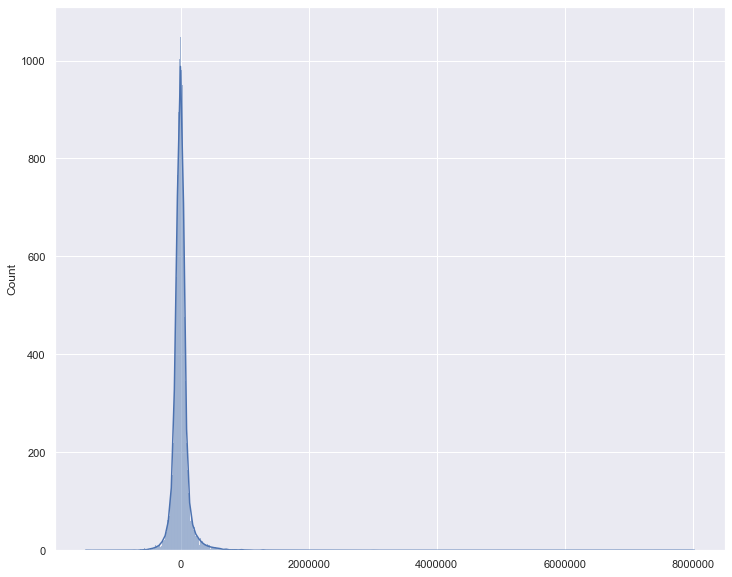

In [231]:
plt.figure(figsize=(12,10))
sns.histplot(model.resid, kde=True)

In [232]:
sign = 0.05
conf = 1 - sign # 0.95

test_stat, p_value = normaltest(model.resid)
print(f'test_stat: {test_stat}\np_value: {p_value}')

if (p_value <= sign):
    print('Rejeitar H0, ou seja, o nosso conjunto de dados NÃO segue uma distribuição normal.')
else:
    print('Aceitar H0, ou seja, o nosso conjunto de dados segue uma distribuição normal.')

test_stat: 47946.60931328455
p_value: 0.0
Rejeitar H0, ou seja, o nosso conjunto de dados NÃO segue uma distribuição normal.


#### 3. Erro deve ser descorrelacionado

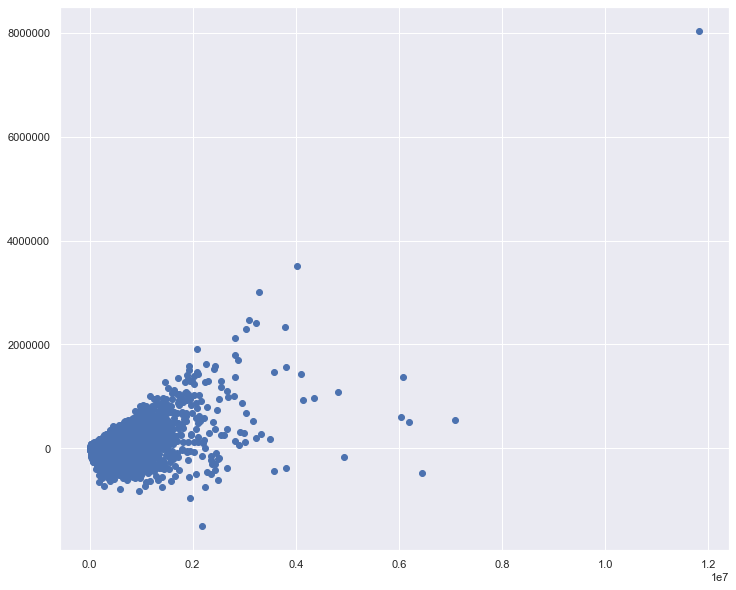

In [234]:
plt.figure(figsize=(12,10))
plt.scatter(y_train, model.resid)